Kode Kelompok   : AD 

Nama Anggota    : 
* Siti Fatimatuzzahro
* Nuke Noviyanti

## Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

## Data Load
Ada dua data yang akan di import yaitu Data Train.csv dan Data Test.csv akan tetapi untuk kebutuhan pembuatan model hanya akan menggunakan Data Train sedangkan Data Test akan digunakan pada evaluasi model/prediksi model. 

In [2]:
#upload data train
from google.colab import files
uploaded = files.upload()

Saving Data Train.csv to Data Train.csv


In [3]:
#upload data test
from google.colab import files
uploaded_test = files.upload()

Saving Data Test.csv to Data Test.csv


In [4]:
#load data train
df_train = pd.read_csv(io.BytesIO(uploaded['Data Train.csv']))
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [33]:
#load data test
df_test = pd.read_csv(io.BytesIO(uploaded_test['Data Test.csv']))
df_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


## EDA (Exploaratory Data Analyst)

### Deskripsi Variabel
Berdasarkan preview dari dataset yang ada berikut merupakan variabel yang ada:
* state adalah variabel untuk menyimpan kode wilayah
* account_length adalah variabel untuk menunjukan lamanya pelanggan menggunakan profider
* area_code adalah variabel yang menunjukan kode area pengguna
* international_plan adalah variabel yang menunjukan rencana penggunaan internasional
* voice_mail_plan adalah variabel yang menunjukan rencana penggunaan voice mail
* number_vmail_plan adalah variabel yang menunjukan rencana penggunaan vmail
* total_day_minutes adalah variabel yang menunjukan penggunaan kartu di siang hari
* total_day_calls adalah variabel yang menunjukan jumlah panggilan di siang hari 
* total_day_charge adalah variabel yang menunjukan jumlah waktu yang dikenakan biaya di siang hari
* total_eve_minutes adalah varibel yang menunjukan penggunaan kartu di sore hari
* total_eve_calls adalah variabel yang menunjukan jumlah panggilan di sore hari
* total_eve_charge adalah variabel yang menunjukan jumlah waktu yang dikenakan biaya di sore hari
* total_night_calls adalah variabel yang menunjukan jumlah panggilan di malam hari
* total_night_charge adalah variabel yang menunjukan jumlah waktu yang dikenakan biaya di malam hari
* total_int1_minutes adalah variabel yang menunjukan waktu penggunaan  panggilan internasional 
* total_int1_calls adalah variabel yang menunjukan jumlah panggilan internasional
* total_int1_charge adalah variabel yang menunjukan jumlah waktu panggilan internasional yang dikenakan biaya
* number_customers_service_calls adalah variabel yang menunjukan jumlah panggilan dengan customers service
* Churn adalah variabel yang menunjukan keputusan pelanggan untuk meninggalkan provider

In [ ]:
#info data train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
#info data test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

### Nilai Kosong (Missing Value)

Dari pengecekan nilai yang ada, dapat dilihat bahwa dari data train maupun data test tidak ada nilai yang kosong atau nilai yang hilang.

In [ ]:
#cek nilai null pada data train
#menghitung jumlah nilai NaN pada setiap kolom data frame df_train
null_valu = df_train.isna().sum().sort_values(ascending=False)

#menghitung persentase nilai NaN pada setiap kolom data frame df_train
pres_Nan = round(null_valu/len(df_train)*100,2)

#menyusun hasil perhitungan persentase nilai NaN pada setiap kolom ke dalam suatu data frame
#dengan kolom 'NaN %' dan menampilkan 5 baris pertama
pd.DataFrame({'NaN %':pres_Nan}).head()


,NaN %
state,0.0
account_length,0.0
number_customer_service_calls,0.0
total_intl_charge,0.0
total_intl_calls,0.0


In [ ]:
#cek data null dari data test#menghitung jumlah nilai NaN pada setiap kolom data frame df_test
null_valu = df_test.isna().sum().sort_values(ascending=False)

#menghitung persentase nilai NaN pada setiap kolom data frame df_test
pres_Nan = round(null_valu/len(df_test)*100,2)

#menyusun hasil perhitungan persentase nilai NaN pada setiap kolom ke dalam suatu data frame
#dengan kolom 'NaN %' dan menampilkan 5 baris pertama
pd.DataFrame({'NaN %':pres_Nan}).head()

,NaN %
id,0.0
state,0.0
total_intl_charge,0.0
total_intl_calls,0.0
total_intl_minutes,0.0


### Deskripsi Dataset

In [ ]:
#deskripsi data train dengan tipe data numerik
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Melihat ringkasan statistik deskriptif dari kolom-kolom dengan tipe data object (termasuk string)
df_train.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


Berdasarkan deskripsi data diatas didapatkan beberapa informasi dasar yaitu:
* Tidak adanya missing value pada masing-masing kolom
* Terdapat duplikasi pada state dan area_code
* Data pada kolom international_plan, voice_mail, dan churn merupakan kategori binary
* No adalah nilai data yang sering muncul pada kolom churn dengan banyaknya 3652 dari 4250 data

Berikut merupakan visualisasi presentase keberlanjutan pelanggan dalam berlangganan kembali:

Text(0.5, 1.0, 'Presentase Pelanggan Berlangganan Kembali')

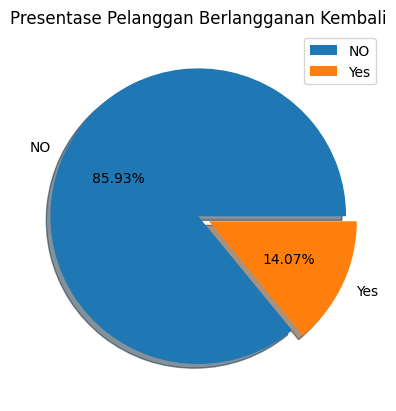

In [6]:
#menghitung jumlah pelanggan yang terus berlangganan dan tidak berlangganan lagi (churn) dalam bentuk proporsi
x = df_train['churn'].value_counts(normalize=True)

#membuat pie chart untuk menampilkan proporsi 
plt.pie(x,autopct = "%1.2f%%",labels =['NO','Yes'],shadow = True, explode = [0, 0.08])

#menambahkan legenda pada pie chart
plt.legend(['NO','Yes'])

#menambahkan judul pada pie chart
plt.title('Presentase Pelanggan Berlangganan Kembali')


Lebih banyak pelanggan yang menghentikan langganan mereka dibandingkan yang tetap berlangganan

Text(0.5, 1.0, 'number_customer_service_calls vs churn')

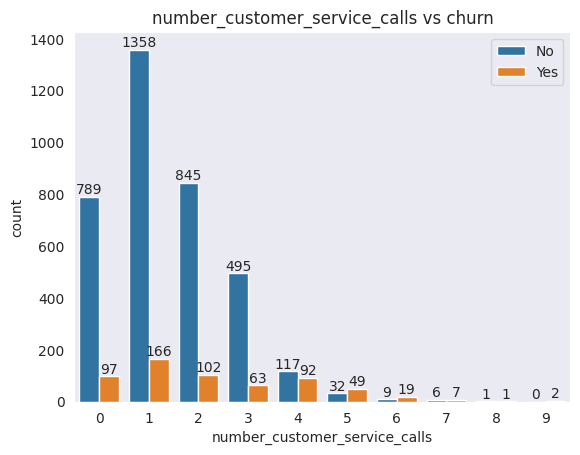

In [7]:
# Mengatur style untuk plot menggunakan seaborn
sns.set_style(style='dark')

# Membuat subplots untuk plot
fig, ax = plt.subplots()

# Membuat countplot untuk jumlah pelanggan yang menghentikan langganan berdasarkan banyak panggilan cs 
x = sns.countplot(x='number_customer_service_calls', data=df_train, hue='churn')

# Menambahkan label pada setiap bar pada countplot
for i in x.containers:
    ax.bar_label(i)

# Menambahkan legend pada plot dengan label "No" dan "Yes"
plt.legend(['No', 'Yes'])

# Menambahkan label pada sumbu x
plt.xlabel('number_customer_service_calls')

# Menambahkan judul pada plot
plt.title('number_customer_service_calls vs churn')


Dari diagram diatas dapat dilihat bahwa setidaknya pelanggan melakukan satu kali panggilan cs untuk memutuskan berhenti langganan namun tidak jarang juga pelanggan yang tidak melakukan panggilan cs akan tetapi tetap tidak melanjutkan langganan.

### Menangani Outliers

#### Visualisasi Outlier menggunakan Boxplot

In [8]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ];

In [ ]:
Num_cols = ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge' ]

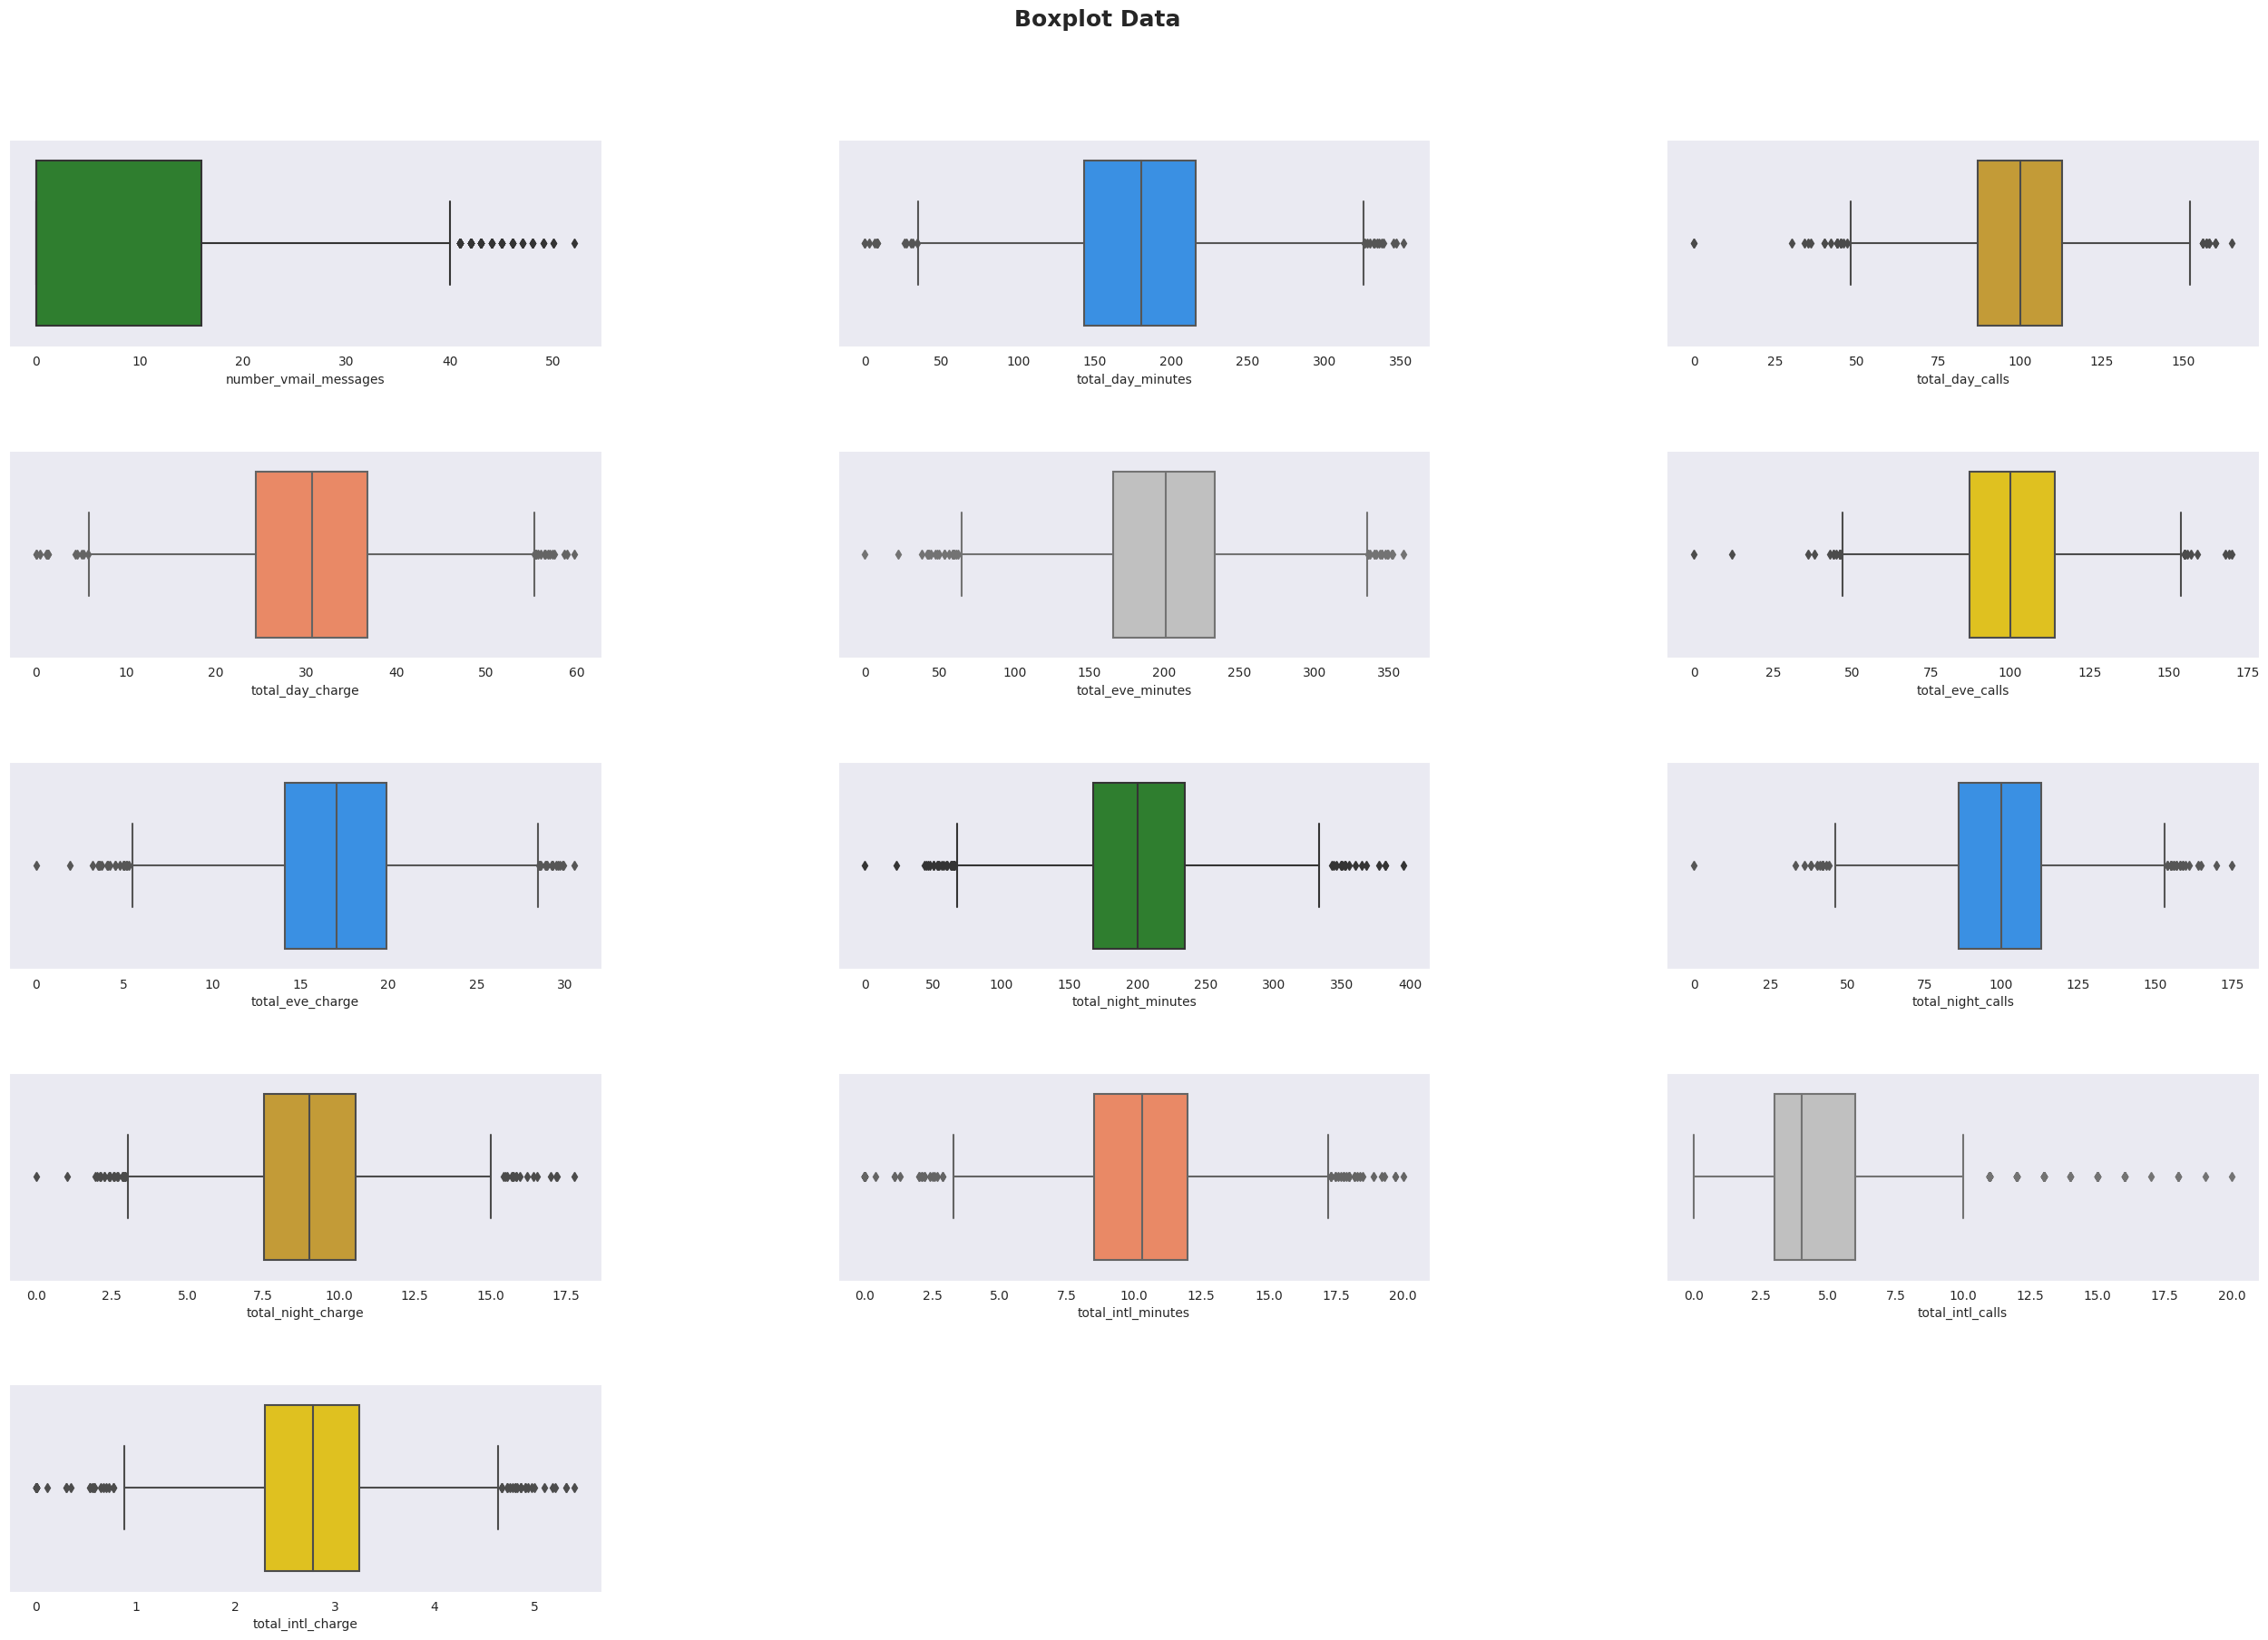

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Boxplot Data', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df_train, x=col ,  color= colours[i]);
 
    

#### Menangani Outlier menggunakan IQR

In [9]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))
for col in ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',
            'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes']:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) & filtered_entries
    
df_train = df_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 4001


In [10]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_test)}')

filtered_entries = np.array([True] * len(df_test))
for col in ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',
            'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes']:
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_test[col] >= low_limit) & (df_test[col] <= high_limit)) & filtered_entries
    
df_test = df_test[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_test)}')

Jumlah baris sebelum memfilter outlier: 750
Jumlah baris setelah memfilter outlier: 712


## Pra-pemrosesan (Pre-processing)

### Feature Engineering (One Hot Encoding)

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#mengubah nilai churn dari string ke numerik
df_train['churn']= encoder.fit_transform(df_train['churn'])

df_train['international_plan'] = encoder.fit_transform(df_train['international_plan'])

df_train['voice_mail_plan'] = encoder.fit_transform(df_train['voice_mail_plan'])

<ipython-input-11-6f5ecc2eeb5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['churn']= encoder.fit_transform(df_train['churn'])
<ipython-input-11-6f5ecc2eeb5e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['international_plan'] = encoder.fit_transform(df_train['international_plan'])
<ipython-input-11-6f5ecc2eeb5e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [12]:
#mengubah nilai string ke numerik data test
df_test['international_plan'] = encoder.fit_transform(df_test['international_plan'])

df_test['voice_mail_plan'] = encoder.fit_transform(df_test['voice_mail_plan'])

<ipython-input-12-f422b17764a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['international_plan'] = encoder.fit_transform(df_test['international_plan'])
<ipython-input-12-f422b17764a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['voice_mail_plan'] = encoder.fit_transform(df_test['voice_mail_plan'])


In [ ]:
df_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


### Korelasi antar Variabel

Dari metrik korelasi yang ada dapat dilihat bahwa faktor yang mempengaruhi pelanggan untuk tidak berlangganan lagi adalah:
* number vmail mesagge
* total day charge
* total eve charge
* total night charge
* total international call charge

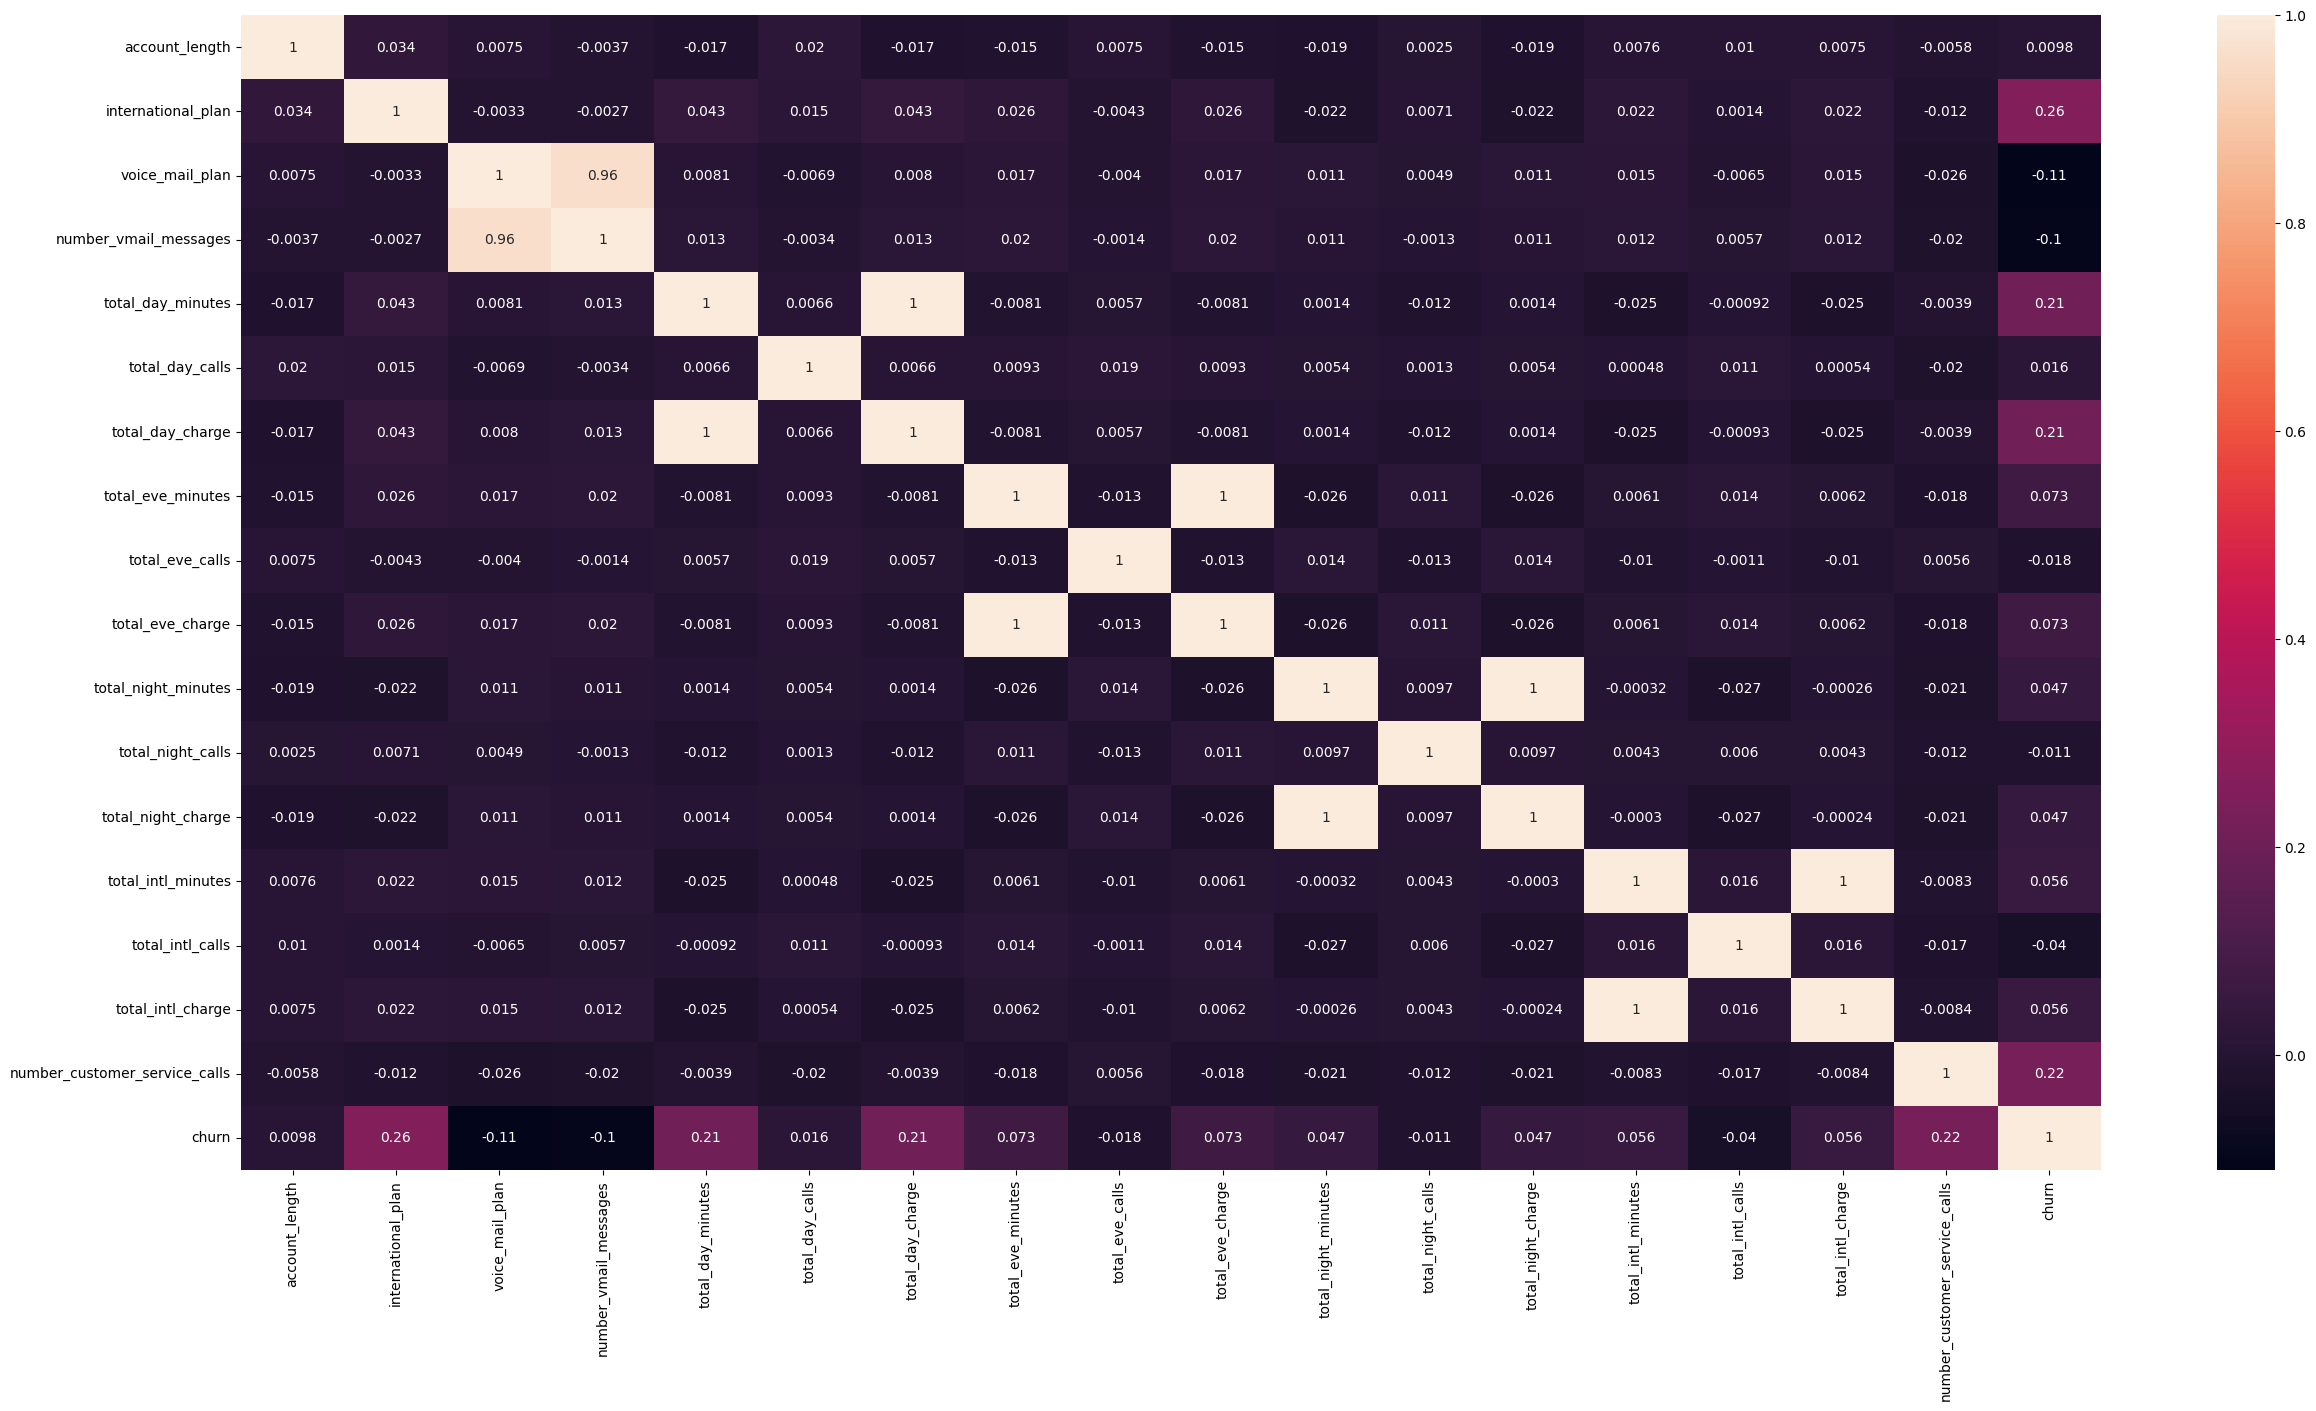

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,15))
#generate a correlation matrix for the whole dataset
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Drop Variabel

In [13]:
#drop variabel pada data train
x_train = df_train.drop(['churn','state','area_code','account_length'], axis=1)
y_train = df_train['churn']
data_test = df_test.drop(['id','state','area_code','account_length'], axis=1)

### Normalisasi

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
data_test = scaler.fit_transform(data_test) 

In [ ]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.719268,0.634615,0.719277,0.202948,0.584906,0.202757,0.348704,0.518248,0.348857,0.619289,0.263158,0.618421,0.000000
1,1.0,0.0,0.0,0.454420,0.625000,0.454398,0.305367,0.698113,0.305469,0.441311,0.642336,0.441152,0.512690,0.157895,0.513158,0.333333
2,1.0,0.0,0.0,0.420925,0.298077,0.420882,0.134543,0.433962,0.134282,0.536204,0.459854,0.535986,0.360406,0.315789,0.360902,0.000000
3,0.0,0.0,0.0,0.324586,0.855769,0.324599,0.608466,0.330189,0.608270,0.524771,0.569343,0.524979,0.644670,0.315789,0.644737,0.444444
4,0.0,0.0,0.0,0.526934,0.759615,0.526914,0.362434,0.943396,0.362383,0.475991,0.445255,0.475868,0.461929,0.263158,0.462406,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.0,0.0,0.0,0.465815,0.644231,0.465773,0.359788,0.849057,0.359715,0.747332,0.321168,0.746825,0.421320,0.105263,0.421053,0.000000
2997,0.0,0.0,0.0,0.723757,0.644231,0.723746,0.722222,0.500000,0.722099,0.610518,0.576642,0.610500,0.380711,0.315789,0.381579,0.111111
2998,0.0,0.0,0.0,0.529006,0.211538,0.528946,0.666289,0.377358,0.666074,0.543445,0.335766,0.543607,0.522843,0.315789,0.522556,0.000000
2999,0.0,0.0,0.0,0.493094,0.394231,0.492992,0.240741,0.320755,0.240551,0.438643,0.408759,0.438611,0.583756,0.315789,0.584586,0.333333


## Model Machine Learning

In [16]:
#library
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
print('Akurasi training: {:.5f}'.format(knn.score(x_train, y_train)))

Akurasi training: 0.92752


In [19]:
dc = tree.DecisionTreeClassifier()
dc= dc.fit(x_train, y_train)

In [20]:
print('Akurasi training: {:.5f}'.format(dc.score(x_train, y_train)))

Akurasi training: 1.00000


In [21]:
mlp = MLPClassifier()
mlp = mlp.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
print('Akurasi training: {:.5f}'.format(mlp.score(x_train, y_train)))

Akurasi training: 0.91927


In [23]:
svm = SVC()
svm = svm.fit(x_train, y_train)

In [24]:
print('Akurasi training: {:.5f}'.format(svm.score(x_train, y_train)))

Akurasi training: 0.93077


In [25]:
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)

In [26]:
print('Akurasi training: {:.5f}'.format(rf.score(x_train, y_train)))

Akurasi training: 1.00000


## Evaluasi Model

In [32]:
#melakukan prediksi dengan data test
pred_knn = knn.predict(data_test)
pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Contoh prediksi diatas ialah prediksi menggunakan model knn. Dapat dilihat bahwa model knn berhasil memprediksi data test yang ada.

### Komparasi Akurasi Model Machine Learning

In [27]:
#variabel dataframe nilai akurasi data train  pada masing-masing algoritma
acc = pd.DataFrame(columns=['train'], index=['KNN','DC','MLP','SVM','RF'])
 
#dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'DC': dc, 'MLP':mlp, 'SVM':svm, 'RF':rf}

#akurasi masing-masing algoritma pada data train 
for name, model in model_dict.items():
    acc.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(x_train))

In [28]:
acc

,train
KNN,0.927518
DC,1.0
MLP,0.91927
SVM,0.930767
RF,1.0


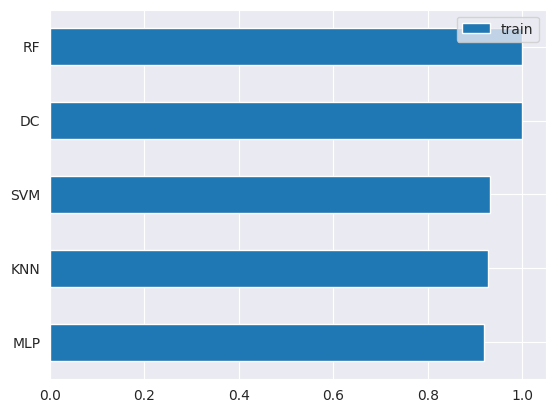

In [29]:
#plot grafik
fig, ax = plt.subplots()
acc.sort_values(by='train', ascending=True).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dapat dilihat dari hasil komparasi bahwasanya model dengan akurasi tertinggi yaitu 100% diraih oleh random forest dan decision tree sedangkan model dengan akurasi terendah diraih oleh multi layer perceptron dengan akurasi mencapai 91%. Hal ini dimungkinkan karena model masih menggunakan default parameter dari library dan tidak menutup kemungkinan jika model mlp dapat ditingkatkan akurasinya dengan melakukan hyper parameter tunning.
